## $\textsf{ResearcherCleveS}$
- github.com/ResearcherClevelS

Hello - It’s been a long time & I thought it would be exciting to engage & interact again with some topics of interest I’ve been exploring.

Here are some models I’ve been working on this week, partially from scratch at this juncture, & am still refining. Wavelets & LSTM neural network for closed loop forecasting.

The mathematics is loosely concise & the Markdown/LaTeX format, giving brief explanations, have some incompatibilities when exported to HTML, .pdf. However the general ideas aren’t difficult to follow & show insight into the powerful filter analysis demonstrated.

Thx

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
# import tensorflow.keras.models as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import sympy as sym

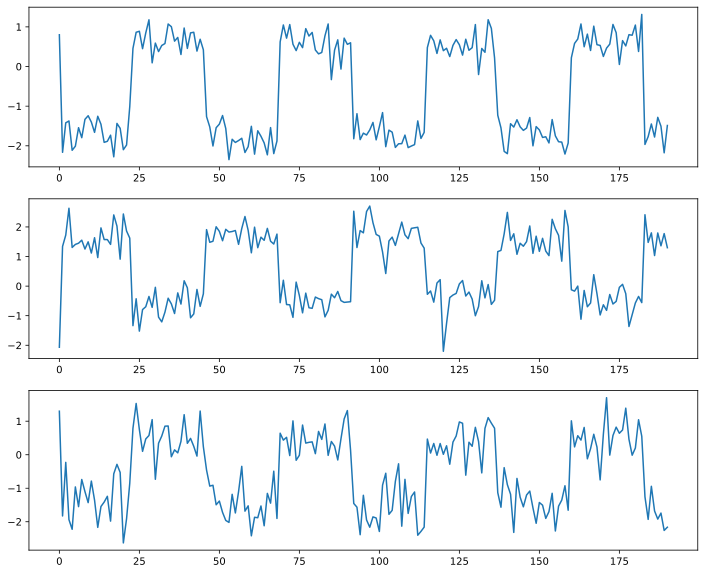

In [2]:
data = pd.read_csv('Closed Loop Forecast Data.csv')
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
for i in range(0, data.columns.size):
    ax[i].plot(data[f"Channel {i+1}"]);

(191,)

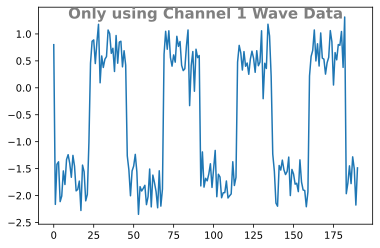

In [3]:
wav_data = data["Channel 1"].values
data["Channel 1"].values.shape, data.shape
plt.plot(wav_data);
plt.title("Only using Channel 1 Wave Data", color='tab:grey', y=.92, fontsize=15, fontweight='bold')
wav_data.shape

In [4]:
wav_data

array([ 0.8004, -2.1634, -1.4197, -1.3738, -2.1123, -2.0102, -1.5431,
       -1.7945, -1.3322, -1.2418, -1.4019, -1.6605, -1.2552, -1.4561,
       -1.9126, -1.886 , -1.7318, -2.2765, -1.4354, -1.5589, -2.0977,
       -1.98  , -1.0133,  0.4569,  0.8638,  0.8887,  0.4501,  0.8461,
        1.1779,  0.0934,  0.5902,  0.3774,  0.5305,  0.5793,  1.0717,
        1.0044,  0.6401,  0.7333,  0.3031,  0.9698,  0.4567,  0.8486,
        0.8637,  0.3892,  0.6872,  0.4217, -1.2639, -1.5234, -2.0036,
       -1.5431, -1.4527, -1.2363, -1.5629, -2.3482, -1.8354, -1.9151,
       -1.8671, -1.8102, -2.1685, -2.0213, -1.5085, -2.2096, -1.6208,
       -1.7591, -1.9264, -2.2267, -1.5411, -2.1957, -1.8791,  0.6215,
        1.0475,  0.716 ,  1.0573,  0.562 ,  0.402 ,  0.6101,  0.4761,
        0.9551,  0.7688,  0.8592,  0.4169,  0.3192,  0.3536,  0.7737,
        1.0724, -0.3303,  0.4124,  0.6724, -0.0638,  0.7154,  0.5598,
        0.5983, -1.8206, -1.1909, -1.843 , -1.6807, -1.7269, -1.599 ,
       -1.4102, -1.8

## $\textsf{The filter design \& operation} \left(\textsf{in the e.g. for sizes} \,\, \underline{\underline{\textsf{H}}}^{12\times 12} \cdot \underline{\textsf{x}}^{12 \times 1}\right) \textsf{are as follows:}$


$$\begin{bmatrix}  h_0 & h_1 & h_2 & h_3 & h_4 & h_5 & 0 & 0 &\cdots & 0 & 0 \\ 
 -h_5 & h_4 & -h_3 & h_2 & -h_1 & h_0 & 0 & 0 & \cdots & 0 & 0 \\ 
 0 & 0 & h_0 & h_1 & h_2 & h_3 & h_4 & h_5 & \cdots & 0 & 0 \\
 0 & 0 & -h_5 & h_4 & -h_3 & h_2 & -h_1 & h_0 & \cdots & 0 & 0 \\ 
 0 & 0 & 0 & 0 & h_0 & h_1 & h_2 & h_3 & \cdots & 0 & 0 \\
 0 & 0 & 0 & 0 & -h_5 & h_4 & -h_3 & h_2 & \cdots & 0 & 0 \\
 \vdots & & \ddots & \ddots & \ddots & & \ddots & \ddots & \ddots & \vdots & \vdots \\
 h_4 & h_5 & \ddots & \ddots & \ddots & & \ddots & h_0 & h_1 & h_2 & h_3 \\ 
 -h_1 & h_0 & \ddots & \ddots & \ddots & & \ddots & -h_5 & h_4 & -h_3 & h_2 \\
  h_2 & h_3 & h_4 & h_5 & \ddots & \ddots & \ddots & \cdots & \ddots & h_0 & h_1 \\ 
  -h_3 & h_2 & -h_1 & h_0 & \ddots & \ddots & \ddots & \cdots & \ddots & -h_5 & h_4 \\\end{bmatrix} \, \cdot \, \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \\ x_8 \\ x_9 \\ x_{10} \\ x_{11} \end{bmatrix} \, = \, \begin{bmatrix} c_0 \\ d_0 \\ c_1 \\ d_1 \\ c_2 \\ d_2 \\ c_3 \\ d_3 \\ c_4 \\ d_4 \\ c_5 \\ d_5 \end{bmatrix}.$$
  
$\textsf{We can think of the $h_n$'s as a $2 \times 6$ array of low-pass filter (LPF) coefficients in the first row and high-pass coefficients (HPF) in the second row.}$
$\textsf{Where $h_n$ correspond with the Daubechies 6 LPF coefficients in the first row and $h_n$'s negated flip in the second row.}$
$\textsf{These filter elements, $h_n$, shifted downward and over to the right by 2 display the downsampling by a factor of 2, which helps along with the orthogonal structure of the}$
$\textsf{filter coefficients, effectively decomposes, extracts underlying information sought from the data vector.}$
$\textsf{The wave data elements $x[n]$ are $\texttt{x[n][::2**i]}$ where $\texttt{i = 4}$.}$ $\textsf{The output generated are the scales and wavelet coefficients denoted $c_n$ and $d_n$, respectively.}$

## $\textsf{Its Continuous wavelet transform $\left(\textsf{CWT}\right)$ version}$

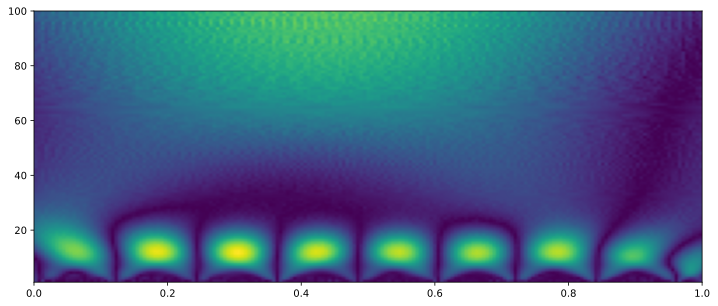

In [9]:
import pywt

# Generate a sample time series
time = np.linspace(0, 1, 1000, endpoint=False)
signal = wav_data

# Perform the Continuous Wavelet Transform (CWT)
wavelet = 'mexh'  # Choose a wavelet function (e.g., 'morl', 'gaus1', 'cgau8')
scales = np.arange(1, 101)  # Define the scales for the CWT
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, 1/len(time))

plt.figure(figsize=(12, 5))
plt.imshow(np.abs(coefficients), extent=[0, 1, 1, 100], aspect='auto',
               origin='lower', cmap='viridis')
plt.show()


## $\textsf{Additional image visual of the frequency against time coeficients.}$

In [5]:
N = 192
wav_flt_lst = []
inv_wav_flt_lst = []
for _ in range(0, 6):
    wav_fltr = np.zeros((N, N))
    wav_flt_lst.append(wav_fltr)
    N = N // 2
[np.shape(wav_flt_lst[i]) for i in range(0, 6)] # Only want up to range 6, the number of coeffs.

[(192, 192), (96, 96), (48, 48), (24, 24), (12, 12), (6, 6)]

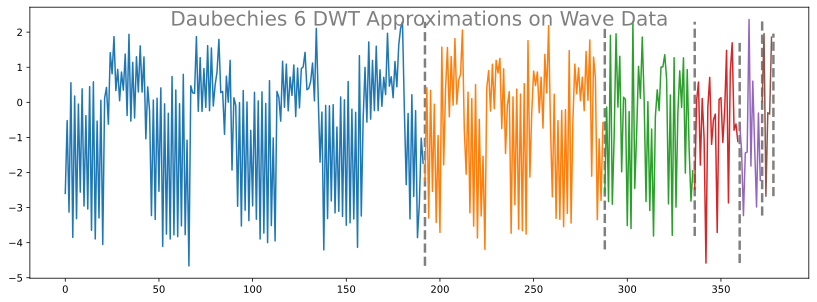

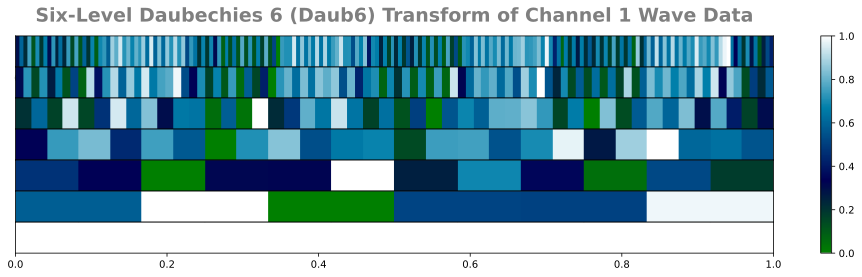

In [250]:
daub6_low = [0.47046721, 1.14111692, 0.650365, -0.19093442, -0.12083221, 0.0498175]
daub6_high = [(-1)**j * i for j, i in enumerate(daub6_low.copy()[::-1])]
fltr = [daub6_low, daub6_high]
conv_flt_wav_dat_lst = []
wave_dat = wav_data.copy()
for i in range(0, len(wav_flt_lst)):
    for j in range(0, len(wav_flt_lst[i])-4, 2):
        wav_flt_lst[i][-4:-3, -4:] = [fltr[0][i] for i in range(4)]
        wav_flt_lst[i][-4:-3, :2 ] = [fltr[0][i] for i in range(5,3,-1)]
        wav_flt_lst[i][-3:-2, -4:] = [fltr[1][i] for i in range(4)]
        wav_flt_lst[i][-3:-2, :2 ] = [fltr[1][i] for i in range(5,3,-1)]
        wav_flt_lst[i][-2:-1, -2:] = [fltr[0][i] for i in range(2)]
        wav_flt_lst[i][-2:-1, :4 ] = [fltr[0][i] for i in range(5,1,-1)]
        wav_flt_lst[i][-1:, -2:] = [fltr[1][i] for i in range(2)]
        wav_flt_lst[i][-1:, :4 ] = [fltr[1][i] for i in range(5,1,-1)]
        wav_flt_lst[i][j:j+2, j:j+len(daub6_low)] = fltr
    if i == 0:
        wave_dat = np.append(wav_data.copy(), np.zeros(1))
    else:
        wave_dat = wav_data.copy()[::2**i]
    conv_flt_wav_dat_lst.append(wav_flt_lst[i] @ wave_dat)

plt.figure(figsize=(14, 5))
n, N = 0, len(conv_flt_wav_dat_lst[0])
for i in range(0, len(conv_flt_wav_dat_lst)):
    plt.plot(range(n, N), conv_flt_wav_dat_lst[i])
    plt.plot([N, N], [conv_flt_wav_dat_lst[i].min(), conv_flt_wav_dat_lst[i].max()],
             color='tab:grey', linestyle='--', linewidth=2.5);
    if i == 5:
        break
    n += conv_flt_wav_dat_lst[i].size
    N += conv_flt_wav_dat_lst[i+1].size
plt.title("Daubechies 6 DWT Approximations on Wave Data", color='tab:grey', y=.91, fontsize=20);

# import matplotlib.colors as colors
fig, ax = plt.subplots(7, 1, figsize=(17, 4))
for j in range(len(ax)-1):
    N = conv_flt_wav_dat_lst[j].size
    im = ax[j].imshow(conv_flt_wav_dat_lst[j][np.newaxis, :],#==.reshape(1, N), 
                      aspect="auto", cmap='ocean');

    plt.rcParams["axes.grid"] = False
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.suptitle("Six-Level Daubechies 6 (Daub6) Transform of Channel 1 Wave Data", fontweight='bold',
                 fontsize=19, x=.435, color='tab:grey');
    # ax[j].set_xlim(0, conv_flt_wav_dat_lst[j].size)
    if j == 7: # Insignificant.
        break
[ax[j].set_yticks([]) for j in range(0, 7)]
plt.colorbar(plt.cm.ScalarMappable(norm=None,
                  cmap="ocean"), 
    ax=ax,
location="right");

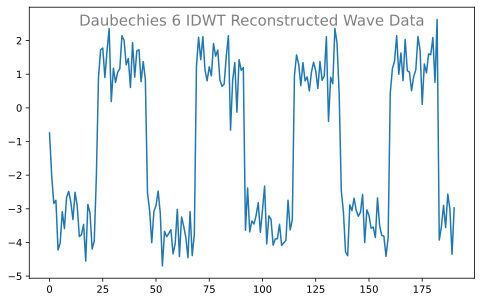

In [7]:
# Reconstruction Inv. wavelet transform (IDWT)
N = 384
time_series_rec = np.zeros(N)
# wav_data_lst = []
flt_lst = []
recon_inv_flt_lst = []
for _ in range(0, 7):
    # wav_data_lst.append(wav_data.copy())
    flt_lst.append(np.zeros((N, N)))
    recon_inv_flt_lst.append(np.zeros((N, N)))
    N = N // 2
[(flt_lst[i].shape, recon_inv_flt_lst[i].shape) for i in range(0, 7)]

time_series_rec_lst = []
for i in range(0, 7):
    if i == 0:
        time_series_rec[::2] = np.append(wav_data.copy()[::2**i], np.zeros(1))
    else:
        time_series_rec[::2] = wav_data.copy()[::2**i]
    time_series_rec_lst.append(time_series_rec)
    time_series_rec = np.zeros(time_series_rec.shape[0] // 2)

conv_flt_t_series = []
recon_final_lst = []
for i in range(0, len(flt_lst)):
    for j in range(0, len(flt_lst[i])-4, 2):
        flt_lst[i][-4:-3, -4:] = [fltr[0][i] for i in range(4)]
        flt_lst[i][-4:-3, :2 ] = [fltr[0][i] for i in range(5,3,-1)]
        flt_lst[i][-3:-2, -4:] = [fltr[1][i] for i in range(4)]
        flt_lst[i][-3:-2, :2 ] = [fltr[1][i] for i in range(5,3,-1)]
        flt_lst[i][-2:-1, -2:] = [fltr[0][i] for i in range(2)]
        flt_lst[i][-2:-1, :4 ] = [fltr[0][i] for i in range(5,1,-1)]
        flt_lst[i][-1:, -2:] = [fltr[1][i] for i in range(2)]
        flt_lst[i][-1:, :4 ] = [fltr[1][i] for i in range(5,1,-1)]
        flt_lst[i][j:j+2, j:j+len(daub6_low)] = fltr
        recon_inv_flt_lst[i] = flt_lst[i].copy().T
    conv_flt_t_series.append(flt_lst[i] @ time_series_rec_lst[i])
    recon_final_lst.append(recon_inv_flt_lst[i] @ conv_flt_t_series[i])
        

plt.figure(figsize=(8, 5))
plt.plot(recon_final_lst[0][:-2:2]);
plt.title("Daubechies 6 IDWT Reconstructed Wave Data", color='tab:grey', y=.91, fontsize=15);

In [8]:
# Prepare data for LSTM (sequence length of 3)
def prepare_data(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)

# Decompose the wav_data into low & high- frequency scales & wavelet coeffs first.
# Then feed as input the separated data into the LSTM or GRU model to train.
# Then implement the closed loop feedback forecast. Finally, reconstruct the 
# WT coeffs approximations based predictions.

sequence_length = 30
# x, y = prepare_data(data, sequence_length)
x, y = prepare_data(conv_flt_wav_dat_lst[0], sequence_length)
x = x.reshape(x.shape[0], x.shape[1], 1)

In [ ]:
# Build LSTM model
model = np.Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', metrics=['mse'], loss='mse')

# Train the model
# model.fit(x, y, epochs=1000 // 2, verbose=0); # May need more epochs.
model.fit(x, y, epochs=1000 // 2, verbose=0); # May need more epochs.

In [ ]:
# Closed-loop forecasting
n_predictions = 192
forecast_input = x[-1]  # Last sequence from the training data
predictions = []

for _ in range(n_predictions):
    # Reshape forecast input for the model
    forecast_input = forecast_input.reshape((1, sequence_length, 1))
    
    # Make prediction
    forecast_output = model.predict(forecast_input, verbose=0)[0] # verbose=1,2 great options.
    
    # Append prediction to the list
    predictions.append(forecast_output[0])
    
    # Update forecast input for the next iteration
    forecast_input = np.append(forecast_input[0][1:], forecast_output)

# Inverse transform predictions
# predictions = np.array(predictions) * 100
print("Predictions:", predictions)

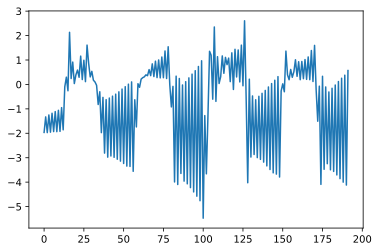

In [9]:
predictions = pd.read_csv('Predictions - Wavelets LSTM Closed Loop Forecast.csv')
preds_1 = predictions["Predictions 1"].values
plt.plot(preds_1);

## $\textsf{Closed Loop Forecasting where it pertains to financial data}$
- $\textsf{it is crucial to preserve its noise flucuations containing information.}$

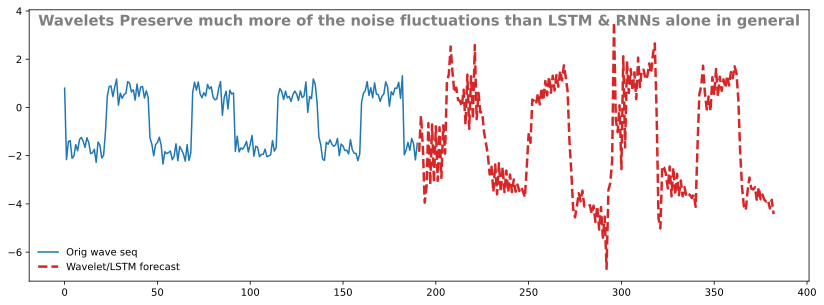

In [10]:
# Perform the reconstruction of the predictions based on wavelet approximations.
recon_sig_approx = recon_inv_flt_lst[1] @ preds_1
plt.figure(figsize=(14, 5))
plt.plot(wav_data, label='Orig wave seq');
plt.plot(range(wav_data.size, wav_data.size+recon_sig_approx.size), recon_sig_approx, color='tab:red',
         linestyle='--', linewidth=2.5, label='Wavelet/LSTM forecast');
plt.title("Wavelets Preserve much more of the noise fluctuations than LSTM & RNNs alone in general",
          color='tab:grey', y=.92, fontsize=14.75, fontweight='bold');
plt.legend(frameon=False, loc='lower left');

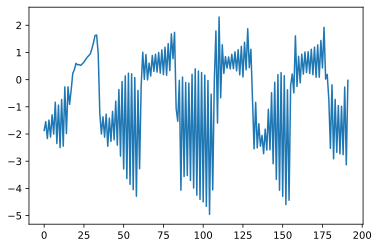

In [11]:
preds_2 = predictions["Predictions 2"].values
plt.plot(preds_2);

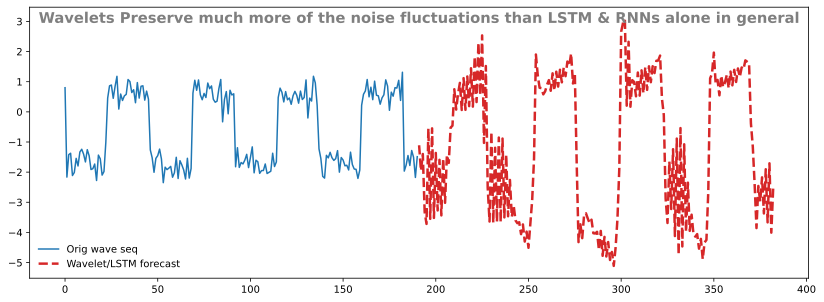

In [12]:
plt.figure(figsize=(14, 5))
# Perform the reconstruction of the predictions based on wavelet approximations.
rec_signal = recon_inv_flt_lst[1] @ preds_2
plt.plot(wav_data, label='Orig wave seq');
plt.plot(range(wav_data.size, wav_data.size+rec_signal.size), rec_signal, color='tab:red',
         linestyle='--', linewidth=2.5, label='Wavelet/LSTM forecast');
plt.title("Wavelets Preserve much more of the noise fluctuations than LSTM & RNNs alone in general",
          color='tab:grey', y=.92, fontsize=14.75, fontweight='bold');
plt.legend(frameon=False, loc='lower left');